In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


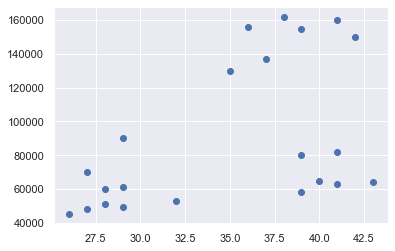

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [5]:
df['predicted_cluster'] = y_pred

In [6]:
df.head()

,Name,Age,Income($),predicted_cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [7]:
df0 = df[df['predicted_cluster'] == 0]
df1 = df[df['predicted_cluster'] == 1]
df2 = df[df['predicted_cluster'] == 2]

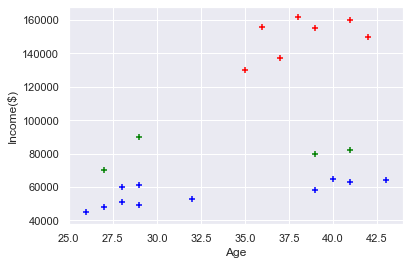

In [8]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df0['Age'],df0['Income($)'], marker = '+', color ='red')
plt.scatter(df1['Age'],df1['Income($)'], marker = '+', color ='green')
plt.scatter(df2['Age'],df2['Income($)'], marker = '+', color ='blue')

In [9]:
df_second = df.drop('predicted_cluster', axis = 1)

In [10]:
df_second.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [13]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_second['Income($)'] = scaler.fit_transform(df_second[['Income($)']])
scaler = MinMaxScaler()

scaler.fit(df_second[['Income($)']])
df_second['Income($)'] = scaler.transform(df_second[['Income($)']])

scaler.fit(df_second[['Age']])
df_second['Age'] = scaler.transform(df_second[['Age']])

In [14]:
df_second.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [15]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df_second[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
df_second['predicted_cluster'] = y_pred

In [17]:
df_0 = df_second[df_second['predicted_cluster'] == 0]
df_1 = df_second[df_second['predicted_cluster'] == 1]
df_2 = df_second[df_second['predicted_cluster'] == 2]

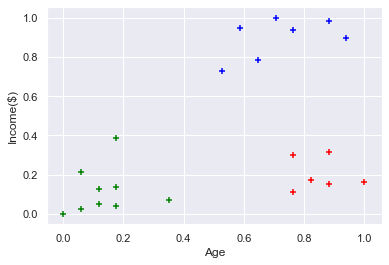

In [18]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df_0['Age'],df_0['Income($)'], marker = '+', color ='red')
plt.scatter(df_1['Age'],df_1['Income($)'], marker = '+', color ='green')
plt.scatter(df_2['Age'],df_2['Income($)'], marker = '+', color ='blue')

In [21]:
sse = []
k_range = range(1,10)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

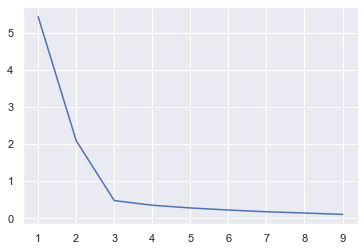

In [22]:
plt.plot(k_range,sse)